# Defining the Problem

* Radius : $r \in [0,R]$
* Mass : $m$
* net energy (per second, going trough a sphere) : $l(r)$ or $L_r$

We have : 
* $m(0) = 0$ and $m(R) = M$
* $l(0) = 0$ and $l(R) = L$ (with $L$ = total luminosity of our star)

We'll put $R \approx 5000 km$ and $M \approx 0.5M_{Sol} = 10^{30} kg$

For now, the main two equation we'll look at are about the Mass and the Pression: 

\begin{align}
\frac{\partial r}{\partial m} &= \frac{1}{4\pi r^2 \rho} \\
\frac{\partial P}{\partial m} &= -\frac{Gm}{4\pi r^4}\\
\end{align}

Where $\rho = \rho(r,t)$ is the density

Mass conservation : $\frac{\partial \rho}{\partial t} = -\nabla \cdot (\rho v) = -\frac{1}{r}\frac{\partial(\rho r^2 v)}{\partial r}$  (spherical symmetry)

## Perfect Gas Law

Using the perfect Gas approxiamtion, we have $P = \frac{\rho k_b T}{\mu m_u} = \rho c_s^2$, where $c_s^2$ is the celerity of the sound (squared) This gives us :

\begin{align}
\frac{\partial P}{\partial \rho} &= c_s^2 \Rightarrow \frac{\partial P}{\partial r} = -\frac{GmP}{c_s^2 r^2}\\

\end{align}

We'll look at the problem in 1D, with $r \in [0,R]$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [20]:
R = 5e6  # in meters
#M = 1e30     # in kg

N = 500


r = np.linspace(1e-10, R, N) # avoid r=0 to prevent singularity
#m = np.linspace(0, M, N)




# ---------- Constantes ----------
G = 6.67430e-11      # m^3 kg^-1 s^-2
m_u = 1.66053906660e-27  # kg (atomic mass unit)
kB = 1.380649e-23  # J K^-1 (Boltzmann constant)

T = 1e7            # température effective (K) -- exemple élevé pour voir pression importante
mu = 0.6           # masse moyenne par particule (dimensionless)
cs2 = kB * T / (mu * m_u)   # vitesse du son au carré (m^2/s^2)

# ---------- Équations différentielles ----------
def hydrostatic_equilibrium(r, y):
    P, m_r = y
    if r == 0:
        dP_dr = 0
        dm_dr = 0
    else:
        dP_dr = -G * m_r * P / (cs2 * r**2)
        dm_dr = 4 * np.pi * r**2 * (P / cs2)
    return [dP_dr, dm_dr]


In [21]:
# Conditions initiales
P_c = 1e16  # Pression centrale (Pa), ajuster selon le modèle
y0 = [P_c, 0]   # [Pression, Masse]
r_span = (1e-10, R)  # Éviter r=0 pour éviter la singularité
sol = solve_ivp(hydrostatic_equilibrium, r_span, y0, t_eval=r, method='RK45')       
P = sol.y[0]
m_r = sol.y[1]      

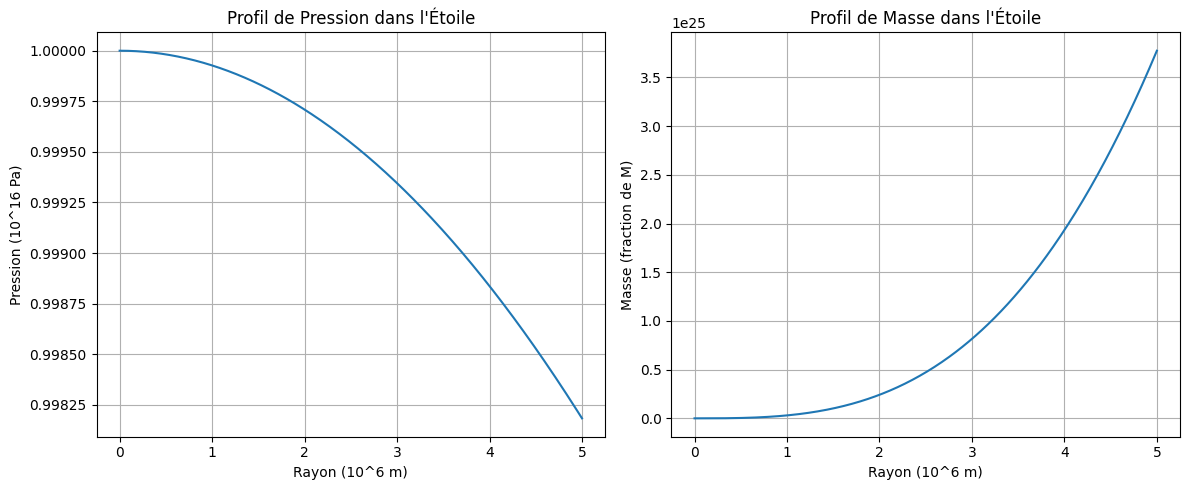

In [23]:
# ---------- Visualisation ----------
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(r / 1e6, P / 1e16)
plt.xlabel('Rayon (10^6 m)')
plt.ylabel('Pression (10^16 Pa)')
plt.title('Profil de Pression dans l\'Étoile')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(r / 1e6, m_r)
plt.xlabel('Rayon (10^6 m)')
plt.ylabel('Masse (fraction de M)')
plt.title('Profil de Masse dans l\'Étoile')
plt.grid()
plt.tight_layout()
plt.show()